In [78]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [141]:
# Image parameters
width = 50
height = 50

# Training parameters
epochs = 50
batch_size = 25
neurons = 500

In [142]:
dataset = {'data': [], 'labels': []}

list_types = ['benigno', 'maligno']
# Benigno will be 0, and Maligno will be 1
for num_tipo, nome_tipo in enumerate(list_types):
    for i,file_name in enumerate(os.listdir(nome_tipo)):
        if i == 100:
            break
        img = cv2.imread(nome_tipo + '/' + file_name, 0)
        # reshape the image
        resized_image = cv2.resize(img, (width, height)) 
        # flatten the image
        resized_image = resized_image.reshape(-1)
        # append each image to the dataset
        dataset['data'].append(resized_image)
        # with respective label
        dataset['labels'].append(num_tipo)

In [143]:
# Converte array para nparray
dataset['data'] = np.array(dataset['data'])
dataset['labels'] = np.array(dataset['labels'])

In [144]:
# Reshape the data to a (70000, 28, 28) tensor
data = dataset['data'].reshape((dataset['data'].shape[0], width, height))

# Reshape the data to a (70000, 28, 28, 1) tensord
data = data[:, :, :, np.newaxis]

# Scale values from range of [0-255] to [0-1]
scaled_data = data / 255.0

In [145]:
# Split the dataset into training and test sets
(train_data, test_data, train_labels, test_labels) = train_test_split(
        scaled_data,
        dataset['labels'].astype("int"), 
        test_size = 0.20)

# Tranform training labels to one-hot encoding
train_labels = np_utils.to_categorical(train_labels, 2)

# Tranform test labels to one-hot encoding
test_labels = np_utils.to_categorical(test_labels, 2)

In [149]:
# Create a sequential model
model = Sequential()

# Add the first convolution layer
model.add(Convolution2D(
    filters = 20,
    kernel_size = (5, 5),
    padding = "same",
    input_shape = (width, height, 1)))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a pooling layer
model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides =  (2, 2)))

# Add the second convolution layer
model.add(Convolution2D(
    filters = 50,
    kernel_size = (5, 5),
    padding = "same"))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a second pooling layer
model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2)))

# Flatten the network
model.add(Flatten())

# Add a fully-connected hidden layer
model.add(Dense(neurons))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a fully-connected output layer
model.add(Dense(2))

# Add a softmax activation function
model.add(Activation("softmax"))

# Compile the network
model.compile(
    loss = "categorical_crossentropy", 
    optimizer = SGD(lr = 0.01),
    metrics = ["accuracy"])

# Train the model 
history = model.fit(
    train_data, 
    train_labels, 
    batch_size = batch_size, 
    epochs = epochs,
    verbose = 1,
    validation_data=(test_data, test_labels))

# Evaluate the model
(loss, accuracy) = model.evaluate(
    test_data, 
    test_labels,
    batch_size = batch_size, 
    verbose = 1)

Train on 159 samples, validate on 40 samples
Epoch 1/50
159/159 [==============================] - 2s 12ms/step - loss: 0.6942 - acc: 0.4780 - val_loss: 0.6950 - val_acc: 0.4250
Epoch 2/50
159/159 [==============================] - 1s 5ms/step - loss: 0.6903 - acc: 0.5597 - val_loss: 0.6938 - val_acc: 0.4500
Epoch 3/50
159/159 [==============================] - 1s 5ms/step - loss: 0.6833 - acc: 0.6038 - val_loss: 0.6844 - val_acc: 0.6500
Epoch 4/50
159/159 [==============================] - 1s 5ms/step - loss: 0.6773 - acc: 0.7170 - val_loss: 0.6828 - val_acc: 0.6000
Epoch 5/50
159/159 [==============================] - 1s 5ms/step - loss: 0.6717 - acc: 0.7233 - val_loss: 0.6827 - val_acc: 0.6250
Epoch 6/50
159/159 [==============================] - 1s 5ms/step - loss: 0.6657 - acc: 0.7170 - val_loss: 0.6852 - val_acc: 0.4750
Epoch 7/50
159/159 [==============================] - 1s 5ms/step - loss: 0.6604 - acc: 0.7296 - val_loss: 0.6836 - val_acc: 0.5000
Epoch 8/50
159/159 [==========

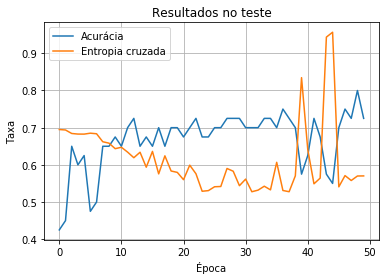

In [150]:
print_test_results(history)

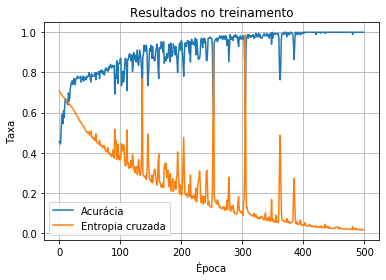

In [89]:
print_train_results(history)

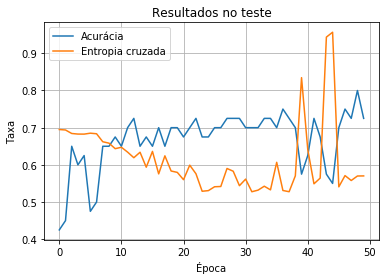

In [152]:
print_test_results(history)

In [76]:
def print_test_results(history):
    plt.plot(history.history['val_acc'])
    plt.plot(history.history['val_loss'])
    plt.title('Resultados no teste')
    plt.ylabel('Taxa')
    plt.xlabel('Época')
    plt.legend(['Acurácia', 'Entropia cruzada'], loc='best')
    plt.grid()
    plt.show()


def print_train_results(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['loss'])
    plt.title('Resultados no treinamento')
    plt.ylabel('Taxa')
    plt.xlabel('Época')
    plt.legend(['Acurácia', 'Entropia cruzada'], loc='best')
    plt.grid()
    plt.show()